In [1]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import pandas as pd
import numpy as np
import lmfit
from lmfit.lineshapes import gaussian2d, lorentzian

In [2]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [3]:
data = pd.read_csv("quadrant 1.csv", sep=",")
data = data.sort_values(by=["Z X-Ray Coordinate", 
                            "Y X-Ray Coordinate",
                            "X X-Ray Coordinate", 
                            "Y Pixel Index",
                            "X Pixel Index"])

# Get Predicted and Original Coordinates

In [4]:
def get_predicted_delta_xy(x, y, z):
    sample = data.loc[(data["X X-Ray Coordinate"] == x) & (data["Y X-Ray Coordinate"] == y) & (data["Z X-Ray Coordinate"] == z)]
    x = sample["X Pixel Index"].to_numpy()
    y = sample["Y Pixel Index"].to_numpy()
    z = sample["Charge Fraction"].to_numpy()
    
    model = lmfit.models.Gaussian2dModel()
    params = model.guess(z, x, y)
    result = model.fit(z, x=x, y=y, params=params)
    
    predicted_delta_x = result.params.get("centerx").value + 0.5 - 2.5
    predicted_delta_y = result.params.get("centery").value + 0.5 - 2.5
    
    return (predicted_delta_x, predicted_delta_y)

In [5]:
def get_original_delta_xy(x, y):
    original_delta_x = x / 20
    original_delta_y = y / 20
    return (original_delta_x, original_delta_y)

# Get Predicted and Original Coordinates for all Quadrants

In [6]:
def get_predicted_and_original_coordinates_q1(x_q1, y_q1, z_q1):
    predicted_delta_x_q1, predicted_delta_y_q1 = get_predicted_delta_xy(x_q1, y_q1, z_q1)
    original_delta_x_q1, original_delta_y_q1 = get_original_delta_xy(x_q1, y_q1)
    
    predicted_x = 2.5 + predicted_delta_x_q1
    predicted_y = 2.5 + predicted_delta_y_q1
    original_x = 2.5 + original_delta_x_q1
    original_y = 2.5 + original_delta_y_q1
    
    return (predicted_x, predicted_y, original_x, original_y)

def get_predicted_and_original_coordinates_q2(x_q2, y_q2, z_q2):
    x_q1 = y_q2
    y_q1 = -x_q2
    z_q1 = z_q2
    
    predicted_delta_x_q1, predicted_delta_y_q1 = get_predicted_delta_xy(x_q1, y_q1, z_q1)
    original_delta_x_q1, original_delta_y_q1 = get_original_delta_xy(x_q1, y_q1)
    
    predicted_delta_x_q2 = -predicted_delta_y_q1
    predicted_delta_y_q2 = predicted_delta_x_q1
    original_delta_x_q2 = -original_delta_y_q1
    original_delta_y_q2 = original_delta_x_q1
    
    predicted_x = 2.5 + predicted_delta_x_q2
    predicted_y = 2.5 + predicted_delta_y_q2
    original_x = 2.5 + original_delta_x_q2
    original_y = 2.5 + original_delta_y_q2
    
    return (predicted_x, predicted_y, original_x, original_y)

def get_predicted_and_original_coordinates_q3(x_q3, y_q3, z_q3):
    x_q1 = -y_q3
    y_q1 = -x_q3
    z_q1 = z_q3
    
    predicted_delta_x_q1, predicted_delta_y_q1 = get_predicted_delta_xy(x_q1, y_q1, z_q1)
    original_delta_x_q1, original_delta_y_q1 = get_original_delta_xy(x_q1, y_q1)
    
    predicted_delta_x_q3 = -predicted_delta_x_q1
    predicted_delta_y_q3 = -predicted_delta_y_q1
    original_delta_x_q3 = -original_delta_x_q1
    original_delta_y_q3 = -original_delta_y_q1

    predicted_x = 2.5 + predicted_delta_x_q3
    predicted_y = 2.5 + predicted_delta_y_q3
    original_x = 2.5 + original_delta_x_q3
    original_y = 2.5 + original_delta_y_q3
    
    return (predicted_x, predicted_y, original_x, original_y)
    
def get_predicted_and_original_coordinates_q4(x_q4, y_q4, z_q4):
    x_q1 = -y_q4
    y_q1 = x_q4
    z_q1 = z_q4
    
    predicted_delta_x_q1, predicted_delta_y_q1 = get_predicted_delta_xy(x_q1, y_q1, z_q1)
    original_delta_x_q1, original_delta_y_q1 = get_original_delta_xy(x_q1, y_q1)
    
    predicted_delta_x_q4 = predicted_delta_y_q1
    predicted_delta_y_q4 = -predicted_delta_x_q1
    original_delta_x_q4 = original_delta_y_q1
    original_delta_y_q4 = -original_delta_x_q1

    predicted_x = 2.5 + predicted_delta_x_q4
    predicted_y = 2.5 + predicted_delta_y_q4
    original_x = 2.5 + original_delta_x_q4
    original_y = 2.5 + original_delta_y_q4
    
    return (predicted_x, predicted_y, original_x, original_y)

# Predict Original X-ray Coordinate based on Computed Charge Distribution

In [7]:
result = pd.DataFrame({"Real X":[], "Predicted X":[], "Real Y":[], "Predicted Y":[]})

for x in range(0,11):
    for y in range(0,11):
        for z in range(0,11):
            predicted_x, predicted_y, original_x, original_y = get_predicted_and_original_coordinates_q1(x,y,z)
            result = result.append({"Real X":original_x, "Predicted X":predicted_x, 
                                    "Real Y":original_y, "Predicted Y":predicted_y, 
                                    "Real Z":z},
                                   ignore_index=True)
            
result["Distance"] = np.sqrt((result["Real X"] - result["Predicted X"])**2 + (result["Real Y"] - result["Predicted Y"])**2)

result

,Real X,Predicted X,Real Y,Predicted Y,Real Z,Distance
0,2.5,2.5,2.5,2.5,0.0,2.634816e-08
1,2.5,2.5,2.5,2.5,1.0,2.650429e-12
2,2.5,2.5,2.5,2.5,2.0,2.161972e-12
3,2.5,2.5,2.5,2.5,3.0,8.999770e-13
4,2.5,2.5,2.5,2.5,4.0,1.165387e-12
...,...,...,...,...,...,...
1326,3.0,3.0,3.0,3.0,6.0,1.936029e-07
1327,3.0,3.0,3.0,3.0,7.0,3.014454e-07
1328,3.0,3.0,3.0,3.0,8.0,4.070067e-07
1329,3.0,3.0,3.0,3.0,9.0,4.845191e-07


In [8]:
np.mean(result["Distance"]), np.median(result["Distance"])
np.min(result["Distance"]), np.max(result["Distance"])

(8.999769973175399e-13, 0.6363960872488199)

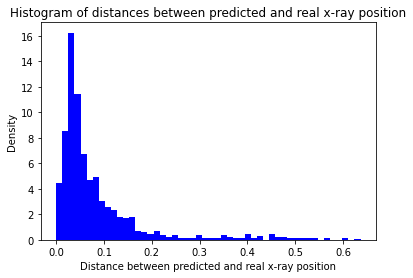

In [9]:
plt.hist(result["Distance"], density=True,  bins = 50, color="blue")
plt.xlabel("Distance between predicted and real x-ray position")
plt.ylabel("Density")
plt.title("Histogram of distances between predicted and real x-ray position");

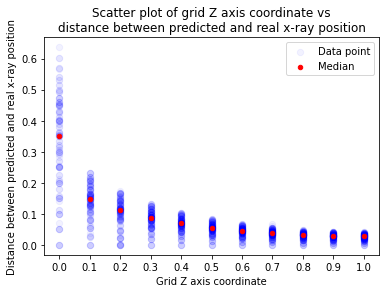

In [11]:
medians = result[["Real Z", "Distance"]].groupby(["Real Z"]).median()
medians = medians.reset_index()
medians["Real Z"] = medians["Real Z"].astype(int)

plt.scatter(0.1 * result["Real Z"], result["Distance"], s=40, alpha=0.05, color="blue", label="Data point")
plt.scatter(0.1 * medians["Real Z"], medians["Distance"], s=20, color="red", label="Median")
plt.plot()
plt.legend()

plt.xticks(0.1 * np.arange(0,11))
plt.xlabel("Grid Z axis coordinate")
plt.ylabel("Distance between predicted and real x-ray position")
plt.title("Scatter plot of grid Z axis coordinate vs\ndistance between predicted and real x-ray position");